# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Признаки
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя


Целевой признак
- Price — цена (евро)

## Подготовка данных

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score, mean_squared_error

In [67]:
df = pd.read_csv('/datasets/autos.csv')

In [68]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [69]:
df.shape

(354369, 16)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [71]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [72]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [73]:
df = df.drop(['DateCrawled','DateCreated','LastSeen', 'PostalCode'], axis=1)

#### Целевой признак

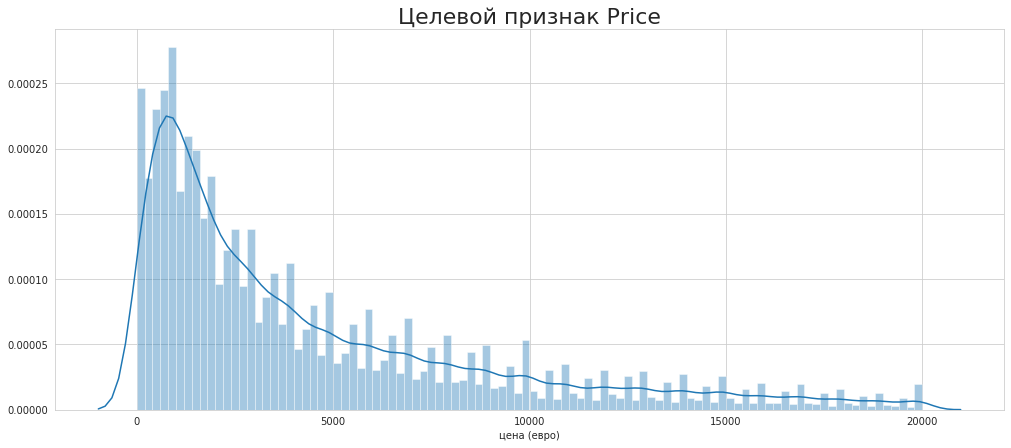

In [74]:
fig = plt.figure(figsize=(17, 7))
sns.set_style('whitegrid')
sns.distplot(df['Price'], bins=100, axlabel='цена (евро)')
plt.title("Целевой признак Price", fontsize=22)
plt.show()

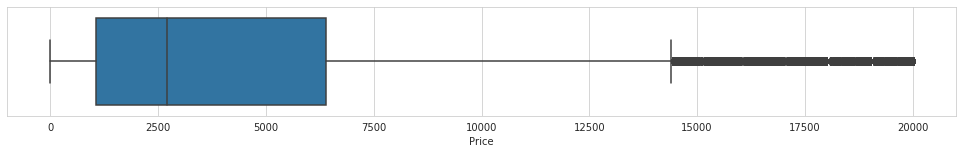

In [75]:
fig = plt.figure(figsize=(17,2))
sns.boxplot(df['Price'])
plt.show()

In [76]:
df[df['Price']==0].shape[0]

10772

У 10772 автомобилей стоимость  равна 0 евро. Данных очень много, если их оставить, наша модель научится присваивать нулевую стоимость. Отсечем выбросов по доверительному интервалу 0.95

In [77]:
#df = df[(df['Price'] < df['Price'].quantile(0.95)) & (df['Price'] > df['Price'].quantile(0.05))]
df = df[df['Price'].between(df['Price'].quantile(0.05), 
                      df['Price'].quantile(0.95), inclusive=False)]

После отсечки выбросов по доверительному интервалу, распределение выглядит следующим образом.

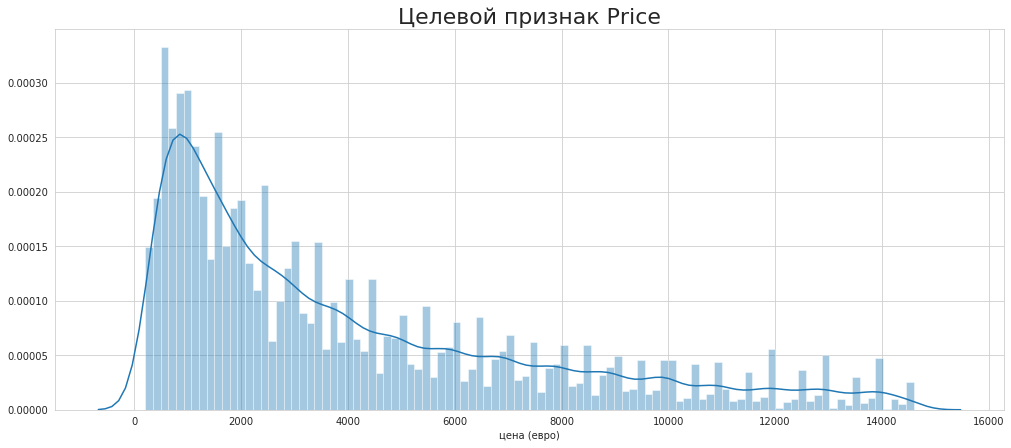

In [78]:
fig = plt.figure(figsize=(17, 7))
sns.set_style('whitegrid')
sns.distplot(df['Price'], bins=100, axlabel='цена (евро)')
plt.title("Целевой признак Price", fontsize=22)
plt.show()

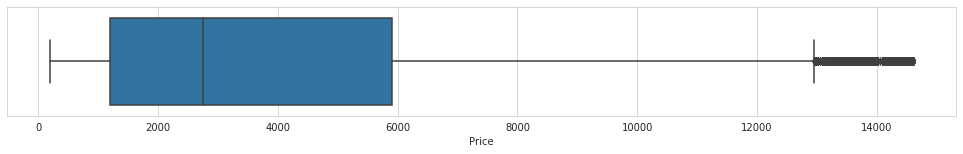

In [79]:
fig = plt.figure(figsize=(17,2))
sns.boxplot(df['Price'])
plt.show()

---

#### Категориальные данные

**VehicleType** — тип автомобильного кузова

In [80]:
df['VehicleType'].unique()

array([nan, 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon',
       'coupe', 'other'], dtype=object)

In [81]:
df['VehicleType'].value_counts()

sedan          83487
small          74075
wagon          59475
bus            26545
convertible    17520
coupe          13466
suv             9405
other           2880
Name: VehicleType, dtype: int64

other(другие), говорит нам о неизвестном типе кузова. Пусть наша модель будет знать данный параметр.

In [82]:
df['VehicleType'].isna().mean()

0.09558026030368763

Почти у 9% данных не заполнен тип кузова.  Удалим пустые значения т.к. данных много. Заполнить можно, например, по моде по модели автомобиля, но это будет не точно.

In [83]:
df.dropna(subset=['VehicleType'],inplace=True)

**Model** — модель автомобиля

In [84]:
df['Model'].unique()

array(['grand', 'golf', 'fabia', '3er', '2_reihe', 'c_max', '3_reihe',
       'passat', 'ka', 'twingo', 'a_klasse', 'scirocco', '5er', 'arosa',
       'other', 'civic', 'transporter', 'punto', 'e_klasse', 'kadett',
       'one', 'fortwo', 'clio', '1er', 'b_klasse', 'signum', 'astra',
       'a8', 'jetta', 'polo', 'fiesta', 'c_klasse', 'micra', 'vito',
       'sprinter', '156', nan, 'escort', 'forester', 'xc_reihe', 'scenic',
       'a4', 'a1', 'combo', 'focus', 'tt', 'corsa', 'a6', 'jazz', 'omega',
       'slk', '7er', '80', '147', 'z_reihe', 'sorento', 'v40', 'ibiza',
       'eos', 'touran', 'getz', 'insignia', 'a3', 'megane', 'lupo', 'r19',
       'mondeo', 'cordoba', 'colt', 'impreza', 'vectra', 'berlingo',
       'tiguan', 'sharan', '6_reihe', 'c4', 'panda', 'up', 'i_reihe',
       'ceed', 'kangoo', 'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe',
       'fox', 'matiz', 'beetle', 'rio', 'logan', 'caddy', 'spider',
       'cuore', 's_max', 'modus', 'a2', 'c3', '1_reihe', 'avensis',
 

Т.к. модель автомобиля не определить, удалим пустые значения.

In [85]:
df.dropna(subset=['Model'],inplace=True)

**Brand** — марка автомобиля

In [86]:
df['Brand'].unique()

array(['jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda',
       'renault', 'mercedes_benz', 'seat', 'honda', 'fiat', 'opel',
       'mini', 'smart', 'audi', 'nissan', 'alfa_romeo', 'subaru', 'volvo',
       'mitsubishi', 'kia', 'hyundai', 'suzuki', 'lancia', 'citroen',
       'toyota', 'chevrolet', 'dacia', 'daihatsu', 'chrysler', 'jaguar',
       'rover', 'porsche', 'daewoo', 'saab', 'land_rover', 'trabant',
       'lada'], dtype=object)

In [87]:
df['Brand'].value_counts()

volkswagen       59134
opel             31260
bmw              28944
mercedes_benz    25478
audi             22706
ford             19764
renault          14052
peugeot           8994
fiat              7554
seat              5492
skoda             4702
smart             4550
mazda             4535
citroen           4231
toyota            3967
nissan            3864
hyundai           2929
volvo             2682
mini              2447
mitsubishi        2360
honda             2232
kia               1961
suzuki            1883
alfa_romeo        1857
chevrolet         1407
chrysler          1142
dacia              810
daihatsu           612
subaru             588
jeep               520
saab               461
daewoo             411
porsche            403
land_rover         397
jaguar             394
lancia             359
rover              332
trabant            325
lada               176
Name: Brand, dtype: int64

**FuelType** — тип топлива

In [88]:
df['FuelType'].unique()

array(['gasoline', 'petrol', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [89]:
df['FuelType'].value_counts()

petrol      178505
gasoline     81144
lpg           4497
cng            489
hybrid         150
other           93
electric        54
Name: FuelType, dtype: int64

Допустим petrol и gasoline синонимы(бензин). Объеденим.

In [90]:
df['FuelType'].where(df['FuelType'] != 'gasoline', 'petrol', inplace=True)

In [91]:
df['FuelType'].value_counts()

petrol      259649
lpg           4497
cng            489
hybrid         150
other           93
electric        54
Name: FuelType, dtype: int64

**NotRepaired** — была машина в ремонте или нет

In [92]:
df['NotRepaired'].unique()

array([nan, 'no', 'yes'], dtype=object)

In [93]:
df['NotRepaired'].isna().mean()

0.14828479785441168

Text(0.5, 0, 'Была машина в ремонте или нет')

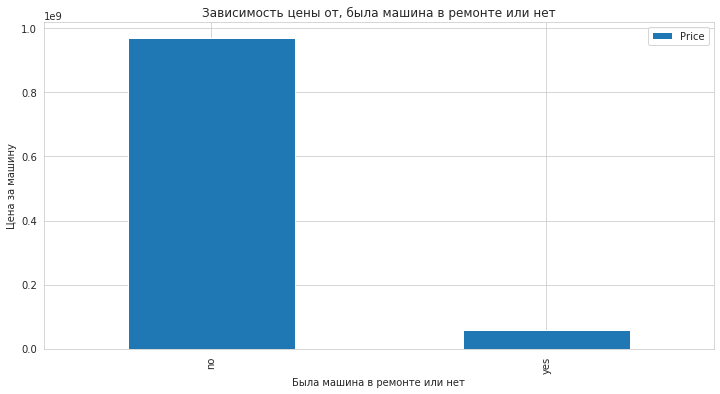

In [94]:
df.pivot_table(index='NotRepaired', values='Price', aggfunc=('sum')).plot(grid=True, figsize=(12, 6), kind='bar')
plt.title('Зависимость цены от, была машина в ремонте или нет')
plt.ylabel('Цена за машину')
plt.xlabel('Была машина в ремонте или нет')

Цена на прямую зависит от была ли машина в ремонте или нет. Т.к. данный признак очень важен удалим пустые признаки.

In [95]:
df.dropna(subset=['NotRepaired'],inplace=True)

**Gearbox** — тип коробки передач

In [96]:
df['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [97]:
df['Gearbox'].value_counts()

manual    186012
auto       44277
Name: Gearbox, dtype: int64

----

#### Количественные признаки

**RegistrationYear** — год регистрации автомобиля

In [98]:
df['RegistrationYear'].sort_values().unique()

array([1910, 1923, 1929, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1942,
       1943, 1945, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018])

Text(0.5, 0, 'год регистрации автомобиля')

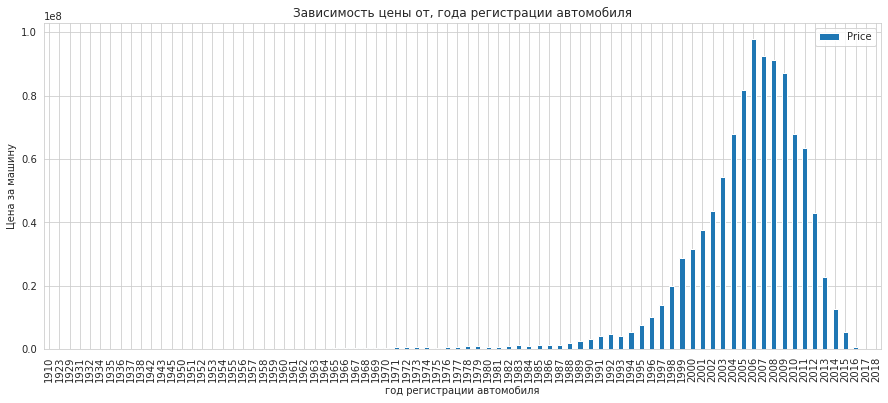

In [99]:
df.pivot_table(index='RegistrationYear', values='Price', aggfunc='sum').plot(grid=True, figsize=(15, 6), kind='bar')
plt.title('Зависимость цены от, года регистрации автомобиля')
plt.ylabel('Цена за машину')
plt.xlabel('год регистрации автомобиля')

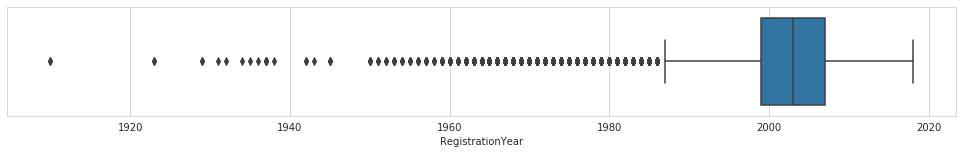

In [100]:
fig = plt.figure(figsize=(17,2))
sns.boxplot(df['RegistrationYear'])
plt.show()

Отсечем выбросов по доверительному интервалу 0.95

In [101]:
df = df[df['RegistrationYear'].between(df['RegistrationYear'].quantile(0.05), 
                      df['RegistrationYear'].quantile(1), inclusive=False)]

Text(0.5, 0, 'год регистрации автомобиля')

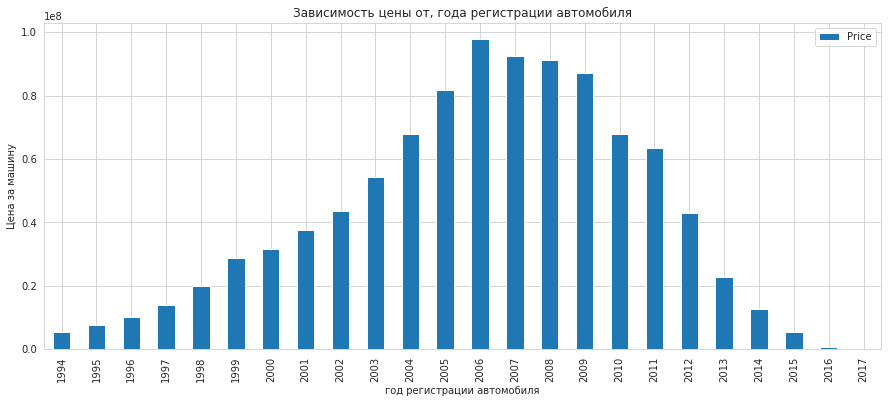

In [102]:
df.pivot_table(index='RegistrationYear', values='Price', aggfunc='sum').plot(grid=True, figsize=(15, 6), kind='bar')
plt.title('Зависимость цены от, года регистрации автомобиля')
plt.ylabel('Цена за машину')
plt.xlabel('год регистрации автомобиля')

**Power** — мощность (л. с.)

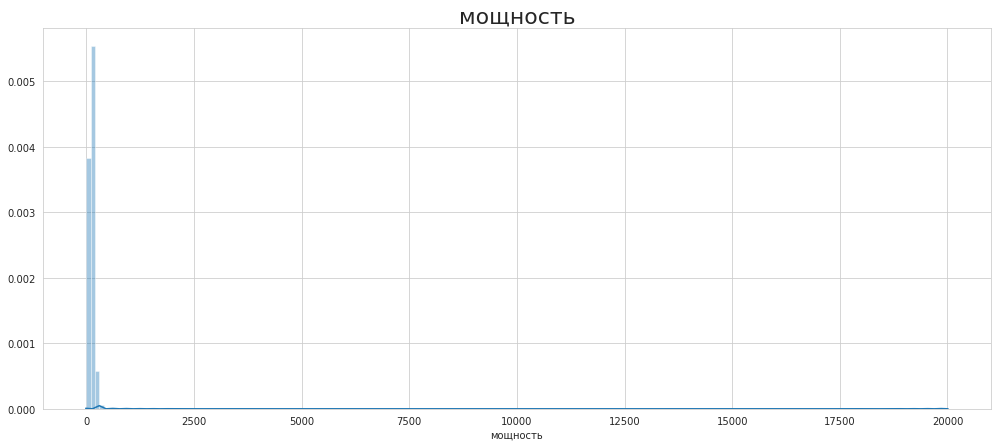

In [103]:
fig = plt.figure(figsize=(17, 7))
sns.set_style('whitegrid')
sns.distplot(df['Power'], bins=200, axlabel='мощность')
plt.title("мощность", fontsize=22)
plt.show()

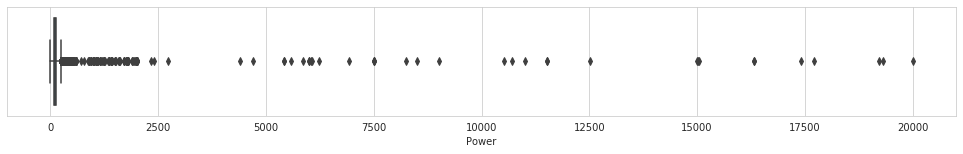

In [104]:
fig = plt.figure(figsize=(17,2))
sns.boxplot(df['Power'])
plt.show()

Уберём мощность двигателя равную 0 и больше 1000.

In [105]:
df = df[df['Power']<1000]

In [106]:
df = df[df['Power']!=0]

**Kilometer** — пробег (км)

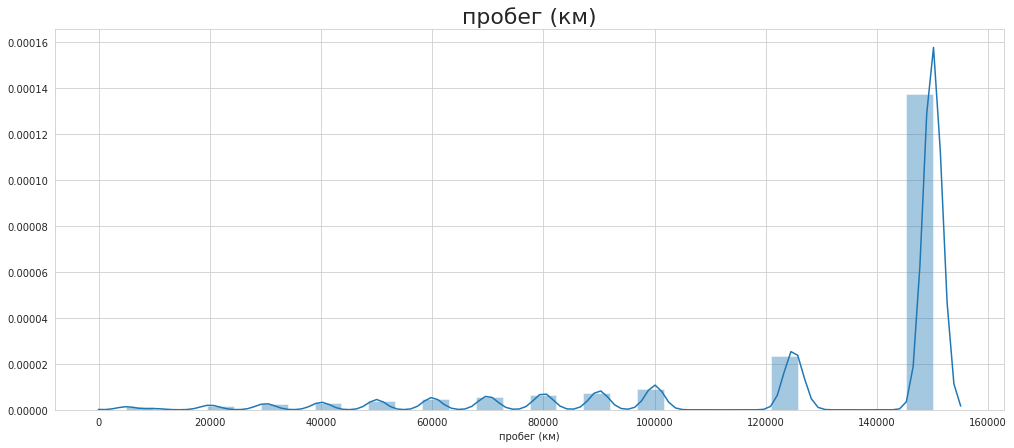

In [107]:
fig = plt.figure(figsize=(17, 7))
sns.set_style('whitegrid')
sns.distplot(df['Kilometer'], bins=30, axlabel='пробег (км)')
plt.title("пробег (км)", fontsize=22)
plt.show()

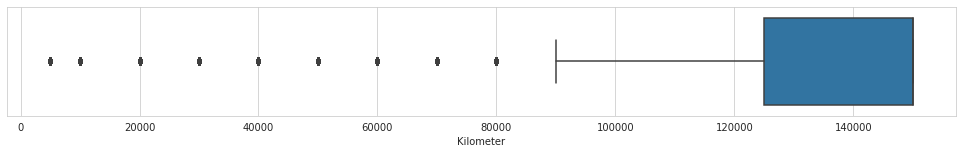

In [108]:
fig = plt.figure(figsize=(17,2))
sns.boxplot(df['Kilometer'])
plt.show()

**RegistrationMonth** — месяц регистрации автомобиля

In [109]:
df['RegistrationMonth'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Text(0.5, 0, 'месяц регистрации автомобиля')

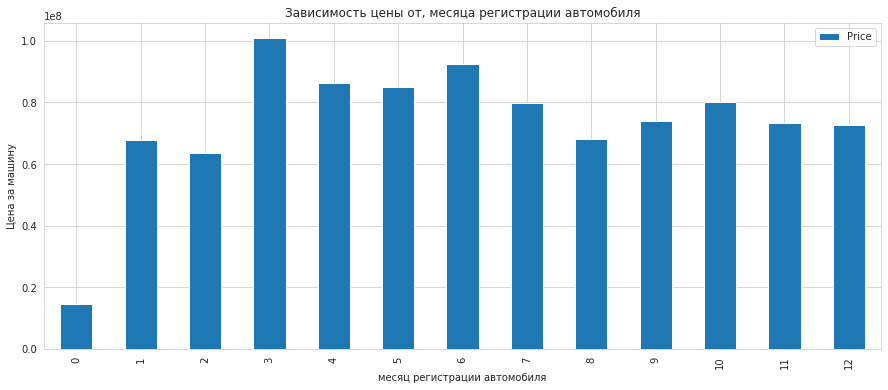

In [110]:
df.pivot_table(index='RegistrationMonth', values='Price', aggfunc='sum').plot(grid=True, figsize=(15, 6), kind='bar')
plt.title('Зависимость цены от, месяца регистрации автомобиля')
plt.ylabel('Цена за машину')
plt.xlabel('месяц регистрации автомобиля')

Наблюдается сезонность, зависимость от месяца регистрации автомобиля.

Уберём нулевой месяц.


In [111]:
df = df[df['RegistrationMonth']!=0]

In [112]:
df.isna().sum()

Price                   0
VehicleType             0
RegistrationYear        0
Gearbox              2034
Power                   0
Model                   0
Kilometer               0
RegistrationMonth       0
FuelType             4021
Brand                   0
NotRepaired             0
NumberOfPictures        0
dtype: int64

In [113]:
df = df.dropna(inplace=False)

In [114]:
df.shape

(200157, 12)

## Обучение моделей

### Прямое кодирование

In [115]:
df_ohe = pd.get_dummies(df,drop_first=True)

In [116]:
df_ohe

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,...,Brand_seat,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
3,1500,2001,75,150000,6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3600,2008,69,90000,7,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,650,1995,102,150000,10,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,2200,2004,109,150000,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2000,2004,105,150000,12,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354359,7900,2010,140,150000,7,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
354360,3999,2005,3,150000,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354362,3200,2004,225,150000,5,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
354366,1199,2000,101,125000,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [117]:
df_ohe.shape

(200157, 301)

### Разбеение данные на выборки

In [118]:
target = df_ohe['Price']
features = df_ohe.drop(['Price'],axis=1)

In [119]:
# Разделение на валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target,
                                                                              test_size=0.25, 
                                                                              random_state=12345)

In [120]:
features_train.shape, features_valid.shape

((150117, 300), (50040, 300))

### Масштабирование признаков

In [121]:
#Стандартизируем маштаб признаков
numeric = ['RegistrationYear','Power','Kilometer']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

### Обучение моделей

In [122]:
import time
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   return ("{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

In [123]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math
from sklearn.metrics import make_scorer

In [124]:
#метрика 
def rmse(target, predict):
    rmse = np.sqrt(mean_squared_error(predict,target))
    return rmse

In [125]:
score_rmse =  make_scorer(rmse, greater_is_better=False)

In [126]:
def base_fit(model, name: str):
    
    start = time.time()
    model.fit(features_train, target_train)
    end = time.time()
    time_fit = exec_time(start,end)
    
    start = time.time()
    predict = model.predict(features_valid)
    end = time.time()
    predict_fit = exec_time(start,end)
    
    rmse_ = np.sqrt(mean_squared_error(predict,target_valid))
    
    r2 = r2_score(predict,target_valid)
    
    return time_fit, predict_fit, rmse_, r2

In [127]:
result = []

#### LinearRegression

In [128]:
#Создаём распределение параметров
rs_params_LinearRegression = {'fit_intercept' : [True, False],
                              'normalize' : [True, False],}

In [129]:
model_LinearRegression = GridSearchCV(LinearRegression(),
                                      rs_params_LinearRegression,
                                      cv=3,
                                      scoring=score_rmse)

In [130]:
result.append(base_fit(model_LinearRegression, 'LinearRegression'))

---

#### DecisionTreeRegressor

In [131]:
from sklearn.tree import DecisionTreeRegressor

In [132]:
#Создаём распределение параметров
rs_params_DecisionTreeRegressor = {'max_depth': range(1, 20)}

In [133]:
#Создаём GridSearchCV
model_DecisionTreeRegressor = GridSearchCV(DecisionTreeRegressor(random_state=12345)
                                                , param_grid=rs_params_DecisionTreeRegressor
                                                , cv=3   
                                                , scoring=score_rmse)

In [134]:
result.append(base_fit(model_DecisionTreeRegressor, 'DecisionTreeRegressor'))

---

#### RandomForestRegressor

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rs_params_RandomForestRegressor = {'max_depth': range(15,20),
                                  'n_estimators': range(10, 50, 10)}

In [137]:
model_RandomForestRegressor = RandomizedSearchCV(RandomForestRegressor(random_state=12345),
                                            param_distributions=rs_params_RandomForestRegressor,
                                            cv=3,
                                            scoring=score_rmse, 
                                            n_iter=4)

In [138]:
result.append(base_fit(model_RandomForestRegressor, 'RandomForestRegressor'))

---

In [139]:
target = df['Price']
features = df.drop(['Price'],axis=1)

In [140]:
# Разделение на валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target,
                                                                              test_size=0.25, 
                                                                              random_state=12345)

In [141]:
features_train['VehicleType'] = features_train['VehicleType'].astype('category')
features_train['Gearbox'] = features_train['Gearbox'].astype('category')
features_train['Model'] = features_train['Model'].astype('category')
features_train['FuelType'] = features_train['FuelType'].astype('category')
features_train['Brand'] = features_train['Brand'].astype('category')
features_train['NotRepaired'] = features_train['NotRepaired'].astype('category')

features_valid['VehicleType'] = features_valid['VehicleType'].astype('category')
features_valid['Gearbox'] = features_valid['Gearbox'].astype('category')
features_valid['Model'] = features_valid['Model'].astype('category')
features_valid['FuelType'] = features_valid['FuelType'].astype('category')
features_valid['Brand'] = features_valid['Brand'].astype('category')
features_valid['NotRepaired'] = features_valid['NotRepaired'].astype('category')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [142]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150117 entries, 208126 to 136666
Data columns (total 11 columns):
VehicleType          150117 non-null category
RegistrationYear     150117 non-null int64
Gearbox              150117 non-null category
Power                150117 non-null int64
Model                150117 non-null category
Kilometer            150117 non-null int64
RegistrationMonth    150117 non-null int64
FuelType             150117 non-null category
Brand                150117 non-null category
NotRepaired          150117 non-null category
NumberOfPictures     150117 non-null int64
dtypes: category(6), int64(5)
memory usage: 7.9 MB


#### LGBMRegressor

In [143]:
from lightgbm import LGBMRegressor

In [144]:
#Создаём распределение параметров
rs_params_LGBMRegressor = {'learning_rate': np.arange(0.1, 0.6, 0.1),
                           'n_estimators': range(100, 300, 20),
                           'max_depth': range(1, 11)}

In [145]:
model_LGBMRegressor = RandomizedSearchCV(LGBMRegressor(),
                                         rs_params_LGBMRegressor,
                                         scoring=score_rmse,
                                         cv=2,
                                         n_iter=4)

In [146]:
result.append(base_fit(model_LGBMRegressor, 'LGBMRegressor'))

---

#### CatBoostRegressor

In [147]:
from catboost import CatBoostRegressor, Pool, cv

In [148]:
#Создаём распределение параметров
rs_params_CatBoostRegressor = {'learning_rate': np.arange(0.1, 0.6, 0.1),
                               'n_estimators': range(100, 300, 20),
                               'max_depth': range(1, 11)}

In [149]:
model_CatBoostRegressor = RandomizedSearchCV(CatBoostRegressor(cat_features=['VehicleType','Gearbox','Model','FuelType','Brand','NotRepaired']),
                                             rs_params_CatBoostRegressor,
                                             scoring=score_rmse,
                                             cv=2,
                                             n_iter=4)

In [150]:
result.append(base_fit(model_CatBoostRegressor, 'CatBoostRegressor'))

0:	learn: 3454.0594773	total: 72.6ms	remaining: 15.9s
1:	learn: 3288.2696362	total: 172ms	remaining: 18.7s
2:	learn: 3147.2558256	total: 270ms	remaining: 19.5s
3:	learn: 3023.4376697	total: 369ms	remaining: 19.9s
4:	learn: 2908.6832575	total: 468ms	remaining: 20.1s
5:	learn: 2813.4941294	total: 566ms	remaining: 20.2s
6:	learn: 2721.7885217	total: 665ms	remaining: 20.2s
7:	learn: 2637.1627900	total: 675ms	remaining: 17.9s
8:	learn: 2570.0739741	total: 772ms	remaining: 18.1s
9:	learn: 2508.1514589	total: 871ms	remaining: 18.3s
10:	learn: 2453.5548386	total: 966ms	remaining: 18.4s
11:	learn: 2398.8657497	total: 1.06s	remaining: 18.5s
12:	learn: 2351.8837999	total: 1.16s	remaining: 18.5s
13:	learn: 2303.2960237	total: 1.26s	remaining: 18.5s
14:	learn: 2262.4678677	total: 1.28s	remaining: 17.4s
15:	learn: 2220.1700129	total: 1.46s	remaining: 18.6s
16:	learn: 2185.5540294	total: 1.56s	remaining: 18.6s
17:	learn: 2155.7325252	total: 1.66s	remaining: 18.6s
18:	learn: 2124.1569724	total: 1.76s	

---

## Анализ моделей

In [151]:
pd.DataFrame(data=result,
index=['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'LGBMRegressor', 'CatBoostRegressor'],
columns=['Время_обучения', 'Время_Предсказания', 'RMSE', 'R2'])

,Время_обучения,Время_Предсказания,RMSE,R2
LinearRegression,00:02:26,00:00:00,7.503444e+09,-0.000013
DecisionTreeRegressor,00:02:14,00:00:00,1.455868e+03,0.821577
RandomForestRegressor,00:14:06,00:00:01,1.281245e+03,0.861654
LGBMRegressor,00:02:25,00:00:02,1.238230e+03,0.871326
CatBoostRegressor,00:03:44,00:00:00,1.251071e+03,0.868684


 По времени обучения и скорости предсказаний лидирует LGBMRegressor. 

## Вывод

Целью нашего проекта было построить модель для определения стоимости автомобиля.

- Данные по продаже автомобилей были изучены. Выполнена предобработка данных, убраны выбросы и пустые значения.
- Закодировали категориальные признаки. Данные были разделены на обучающею и тестовую выборки. Затем количественные признаки отмасштабировали.
- Обучили различные модели с несколькими признаками.
- Провели сравнительный анализ качества, скорости и качества предсказаний моделй.
- Выявили, что лучшей моделью для решения нашей задачи является LGBMRegressor.